# Table of Contents
 <p><div class="lev1 toc-item"><a href="#GPU" data-toc-modified-id="GPU-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>GPU</a></div><div class="lev1 toc-item"><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preprocessing</a></div><div class="lev2 toc-item"><a href="#Load-Data" data-toc-modified-id="Load-Data-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load Data</a></div><div class="lev3 toc-item"><a href="#Load-Train-Data" data-toc-modified-id="Load-Train-Data-211"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Load Train Data</a></div><div class="lev3 toc-item"><a href="#Load-Test-Data" data-toc-modified-id="Load-Test-Data-212"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Load Test Data</a></div><div class="lev3 toc-item"><a href="#Relation-Types" data-toc-modified-id="Relation-Types-213"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Relation Types</a></div><div class="lev2 toc-item"><a href="#Participle" data-toc-modified-id="Participle-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Participle</a></div><div class="lev2 toc-item"><a href="#Make-Adjacency-List" data-toc-modified-id="Make-Adjacency-List-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Make Adjacency List</a></div><div class="lev3 toc-item"><a href="#Make-Adjacency-List-of-Train-Data" data-toc-modified-id="Make-Adjacency-List-of-Train-Data-231"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Make Adjacency List of Train Data</a></div><div class="lev3 toc-item"><a href="#Make-Adjacency-List-of-Test-Data" data-toc-modified-id="Make-Adjacency-List-of-Test-Data-232"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Make Adjacency List of Test Data</a></div><div class="lev1 toc-item"><a href="#Word-to-Vector" data-toc-modified-id="Word-to-Vector-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Word to Vector</a></div><div class="lev2 toc-item"><a href="#Tokenize-Text" data-toc-modified-id="Tokenize-Text-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Tokenize Text</a></div><div class="lev2 toc-item"><a href="#Create-Word-Embeddings-with-GloVe" data-toc-modified-id="Create-Word-Embeddings-with-GloVe-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Create Word Embeddings with GloVe</a></div><div class="lev3 toc-item"><a href="#Read-GloVe" data-toc-modified-id="Read-GloVe-321"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Read GloVe</a></div><div class="lev3 toc-item"><a href="#Use-Glove-to-Initialize-Embedding-Matrix" data-toc-modified-id="Use-Glove-to-Initialize-Embedding-Matrix-322"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Use Glove to Initialize Embedding Matrix</a></div><div class="lev1 toc-item"><a href="#Build-Dateset" data-toc-modified-id="Build-Dateset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Build Dateset</a></div><div class="lev1 toc-item"><a href="#Save-Dataset" data-toc-modified-id="Save-Dataset-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Save Dataset</a></div><div class="lev1 toc-item"><a href="#Checkpoint" data-toc-modified-id="Checkpoint-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Checkpoint</a></div><div class="lev1 toc-item"><a href="#Build-Model" data-toc-modified-id="Build-Model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Build Model</a></div><div class="lev2 toc-item"><a href="#Set-Hyperparameters" data-toc-modified-id="Set-Hyperparameters-71"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Set Hyperparameters</a></div><div class="lev2 toc-item"><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-72"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Import Libraries</a></div><div class="lev2 toc-item"><a href="#Build-Graph" data-toc-modified-id="Build-Graph-73"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Build Graph</a></div><div class="lev2 toc-item"><a href="#Model-Visualization" data-toc-modified-id="Model-Visualization-74"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Model Visualization</a></div><div class="lev2 toc-item"><a href="#Train" data-toc-modified-id="Train-75"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Train</a></div><div class="lev1 toc-item"><a href="#Evaluate" data-toc-modified-id="Evaluate-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Evaluate</a></div>

# GPU

In [1]:
import tensorflow as tf 
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

Default GPU Device: 


# Data Preprocessing

## Load Data

### Load Train Data

In [1]:
import json

In [4]:
sentText = []
relationMentions = []
relationLabels = []
entityMentions = []
entityLabels = []
em1Text = []
em2Text = []

with open("/Users/lizhn7/Downloads/DATA/nyt/train.json") as f:
    lines = f.readlines()

for line in lines:
    item = json.loads(line)
    # Exclude "None" label
    if not all(i['label'] == 'None' for i in item['relationMentions']):
        sentText.append(item['sentText'])
        relationMentions.append(item['relationMentions'])
        entityMentions.append(item['entityMentions'])
    
relationLabels = [[i['label'].split('/')[-1] for i in rM] for rM in relationMentions]
entityLabels = [[i['text'] for i in eM] for eM in entityMentions]
em1Text = [[i['em1Text'] for i in rM] for rM in relationMentions]
em2Text = [[i['em2Text'] for i in rM] for rM in relationMentions]

In [5]:
# Clean words
replaceDict = {
               'ā': 'a', 'á': 'a', 'ǎ': 'a', 'à': 'a',
               'ō': 'o', 'ó': 'o', 'ǒ': 'o', 'ò': 'o', 'ô': 'o', 'ö': 'o',
               'ē': 'e', 'é': 'e', 'ě': 'e', 'è': 'e', 
               'ī': 'i', 'í': 'i', 'ǐ': 'i', 'ì': 'i',
               'ū': 'u', 'ú': 'u', 'ǔ': 'u', 'ù': 'u', 'ü': 'u',
               'ñ': 'n',
               'É': 'E'
              }
em1Text = [[''.join([replaceDict.get(i, i) for i in e]) for e in eT] for eT in em1Text]
em2Text = [[''.join([replaceDict.get(i, i) for i in e]) for e in eT] for eT in em2Text]

### Load Test Data

In [6]:
t_sentText = []
t_relationMentions = []
t_relationLabels = []
t_entityMentions = []
t_entityLabels = []
t_em1Text = []
t_em2Text = []

with open("/Users/lizhn7/Downloads/DATA/nyt/test.json") as f:
    lines = f.readlines()

for line in lines:
    item = json.loads(line)
    t_sentText.append(item['sentText'])
    t_relationMentions.append(item['relationMentions'])
    t_entityMentions.append(item['entityMentions'])
    
t_relationLabels = [[i['label'].split('/')[-1] for i in rM] for rM in t_relationMentions]
t_entityLabels = [[i['text'] for i in eM] for eM in t_entityMentions]
t_em1Text = [[i['em1Text'] for i in rM] for rM in t_relationMentions]
t_em2Text = [[i['em2Text'] for i in rM] for rM in t_relationMentions]

In [7]:
# Clean words
t_replaceDict = {
               'ā': 'a', 'á': 'a', 'ǎ': 'a', 'à': 'a',
               'ō': 'o', 'ó': 'o', 'ǒ': 'o', 'ò': 'o', 'ô': 'o', 'ö': 'o',
               'ē': 'e', 'é': 'e', 'ě': 'e', 'è': 'e', 
               'ī': 'i', 'í': 'i', 'ǐ': 'i', 'ì': 'i',
               'ū': 'u', 'ú': 'u', 'ǔ': 'u', 'ù': 'u', 'ü': 'u',
               'ñ': 'n',
               'É': 'E'
              }
t_em1Text = [[''.join([t_replaceDict.get(i, i) for i in e]) for e in eT] for eT in t_em1Text]
t_em2Text = [[''.join([t_replaceDict.get(i, i) for i in e]) for e in eT] for eT in t_em2Text]
t_entityLabels = [[''.join([t_replaceDict.get(i, i) for i in e]) for e in eT] for eT in t_entityLabels]

###  Relation Types

In [8]:
relationTypes = list(set([r for rl in relationLabels for r in rl]))
relationTypes

['major_shareholders',
 'teams',
 'place_founded',
 'founders',
 'company',
 'advisors',
 'ethnicity',
 'geographic_distribution',
 'neighborhood_of',
 'capital',
 'place_of_birth',
 'contains',
 'place_of_death',
 'religion',
 'place_lived',
 'children',
 'industry',
 'country',
 'major_shareholder_of',
 'location',
 'administrative_divisions',
 'nationality',
 'profession',
 'people']

## Participle

In [9]:
from nltk import regexp_tokenize

In [10]:
def cut(s):
    """
    Participle
    """
    pattern = r'''
              (?x)                   # set flag to allow verbose regexps 
              (?:[A-Z]\.)+           # abbreviations, e.g. U.S.A. 
              |\d+(?:\.\d+)?%?       # numbers, incl. currency and percentages 
              |\w+(?:[-']\w+)*       # words w/ optional internal hyphens/apostrophe  
           '''  
    return regexp_tokenize(s, pattern=pattern)

In [11]:
sentWords = [cut(s) for s in sentText]
entlabWords = [[cut(s) for s in eL] for eL in entityLabels]
em1Words = [[cut(s) for s in eL] for eL in em1Text]
em2Words = [[cut(s) for s in eL] for eL in em2Text]
t_sentWords = [cut(s) for s in t_sentText]
t_entlabWords = [[cut(s) for s in eL] for eL in t_entityLabels]
t_em1Words = [[cut(s) for s in eL] for eL in t_em1Text]
t_em2Words = [[cut(s) for s in eL] for eL in t_em2Text]

In [12]:
MAX_SENT_LEN = 120
MAX_ADJL_LEN = 28

In [13]:
#len([i for i, j in enumerate(sentWords) if len(j) > 80])
#max(len(j) for i, j in enumerate(t_sentWords) if len(j) > 80)

## Make Adjacency List

### Make Adjacency List of Train Data

In [14]:
from collections import Counter

In [15]:
i_entityLabels = []
for i in range(len(sentWords)):
    eL = []
    sDict = list(enumerate(sentWords[i]))
    for item in entlabWords[i]:
        j = 0
        el = []
        for e in item:
            while j < len(sDict):
                if e == sDict[j][1]:
                    el.append(sDict[j][0])
                    j += 1
                    break
                j += 1
        eL.append(el)
    i_entityLabels.append(eL)

In [16]:
adjacencyList = []
padDict = ['POI', 'RE', 'EOP']
for i in range(len(sentWords)):
    # POI means pointer
    # RE means relation label
    # EOP means end of pointer   
    aL = ''
    for j in entityLabels[i]:
        dictEn = dict((b, a) for a, b in enumerate(entityLabels[i]))
        # Exclude further "None" label
        if j in em1Text[i]:
            aL += j
        in_em1Text = [dictEn[item] for item in em1Text[i]]
        in_em2Text = [dictEn[item] for item in em2Text[i]]
        new_em1 = [m[0] for m in sorted(list(zip(in_em1Text, in_em2Text)))]
        new_em2 = [n[1] for n in sorted(list(zip(in_em1Text, in_em2Text)))]
        new_em1 = [entityLabels[i][e1] for e1 in new_em1]
        new_em2 = [entityLabels[i][e2] for e2 in new_em2]
        listRe = list(zip(zip(in_em1Text, in_em2Text), relationLabels[i]))
        new_rel = [r[-1] for r in sorted(listRe, key=lambda z: z[0])]
        for item in enumerate(new_em1):
            if j == item[1]:
                aL = aL + ' POI ' + new_em2[item[0]] + ' RE ' + new_rel[item[0]]
        if j in em1Text[i]:
            aL += ' EOP '
    adjacencyList.append(aL)

In [25]:
len(adjacencyList)

66336

In [20]:
i_adjacencyList = []
for i in range(len(adjacencyList)):
    aL = []
    replace = dict(zip(sum(entlabWords[i], []), sum(i_entityLabels[i], []), ))
    aL = [replace[j] if j not in padDict+relationTypes else j for j in cut(adjacencyList[i])]
    #aL = [s if type(s) == str else str(s) for s in aL]
    i_adjacencyList.append(aL)

In [24]:
print(adjacencyList[0])

Bobby Fischer POI Reykjavik RE place_of_death POI Iceland RE nationality EOP Iceland POI Reykjavik RE capital POI Reykjavik RE contains EOP 


In [23]:
print(i_adjacencyList[0])

[14, 15, 'POI', 31, 'RE', 'place_of_death', 'POI', 32, 'RE', 'nationality', 'EOP', 32, 'POI', 31, 'RE', 'capital', 'POI', 31, 'RE', 'contains', 'EOP']


In [20]:
#[i for i in i_adjacencyList if i[0] == 'POI']

In [21]:
#[eT[0] for eT in enumerate(em1Text) for i in eT[1] if i == 'Édith Piaf']

In [22]:
#i_em1Text = []
#for i in range(len(sentWords)):
#    temp = list(zip(sum(i_entityLabels[i], []), sum(entlabWords[i], [])))
#    eM1 = []
#    for ee in em1Words[i]:
#        j = 0
#        em1 = []
#        for e in ee:
#            while j < len(temp):
#                if e == temp[j][1] and Counter(sum(entlabWords[i], []))[e] == 1:
#                    em1.append(temp[j][0])
#                    break
#                if e == temp[j][1] and Counter(sum(entlabWords[i], []))[e] > 1:
#                    em1.append(temp[j][0])
#                    j += 1
#                    break
#                j += 1
#        eM1.append(em1)
#    i_em1Text.append(eM1)

#i_em2Text = []
#for i in range(len(sentWords)):
#    temp = list(zip(sum(i_entityLabels[i], []), sum(entlabWords[i], [])))
#    eM2 = []
#    for ee in em2Words[i]:
#        j = 0
#        em2 = []
#        for e in ee:
#            while j < len(temp):
#                if e == temp[j][1] and Counter(sum(entlabWords[i], []))[e] == 1:
#                    em2.append(temp[j][0])
#                    break
#                if e == temp[j][1] and Counter(sum(entlabWords[i], []))[e] > 1:
#                    em2.append(temp[j][0])
#                    j += 1
#                    break
#                j += 1
#        eM2.append(em2)
#    i_em2Text.append(eM2)

### Make Adjacency List of Test Data

In [23]:
# Clean words
t_sentWords = [[''.join([t_replaceDict.get(i, i) for i in e]) for e in eT] for eT in t_sentWords]

In [24]:
ti_entityLabels = []
for i in range(len(t_sentWords)):
    eL = []
    t_sDict = list(enumerate(t_sentWords[i]))
    for item in t_entlabWords[i]:
        j = 0
        el = []
        for e in item:
            while j < len(t_sDict):
                if e == t_sDict[j][1]:
                    el.append(t_sDict[j][0])
                    j += 1
                    break
                j += 1
        eL.append(el)
    ti_entityLabels.append(eL)

In [25]:
t_adjacencyList = []
padDict = ['POI', 'RE', 'EOP']
for i in range(len(t_sentWords)):
    # POI means pointer
    # RE means relation label
    # EOP means end of pointer   
    aL = ''
    for j in t_entityLabels[i]:
        t_dictEn = dict((b, a) for a, b in enumerate(t_entityLabels[i]))
        # Exclude further "None" label
        if j in [it['em1Text'] for it in t_relationMentions[i] if it['label'] != 'None' and j in it['em1Text']]:
            aL += j
        tin_em1Text = [t_dictEn[item] for item in t_em1Text[i]]
        tin_em2Text = [t_dictEn[item] for item in t_em2Text[i]]
        new_tem1 = [m[0] for m in sorted(list(zip(tin_em1Text, tin_em2Text)))]
        new_tem2 = [n[1] for n in sorted(list(zip(tin_em1Text, tin_em2Text)))]
        new_tem1 = [t_entityLabels[i][e1] for e1 in new_tem1]
        new_tem2 = [t_entityLabels[i][e2] for e2 in new_tem2]
        t_listRe = list(zip(zip(tin_em1Text, tin_em2Text), t_relationLabels[i]))
        new_trel = [r[-1] for r in sorted(t_listRe, key=lambda z: z[0])]
        for item in enumerate(new_tem1):
            if j == item[1] and new_trel[item[0]] != 'None':
                aL = aL + ' POI ' + new_tem2[item[0]] + ' RE ' + new_trel[item[0]]
        if j in [it['em1Text'] for it in t_relationMentions[i] if it['label'] != 'None' and j in it['em1Text']]:
            aL += ' EOP '
    t_adjacencyList.append(aL)

In [26]:
ti_adjacencyList = []
for i in range(len(t_adjacencyList)):
    aL = []
    replace = dict(zip(sum(t_entlabWords[i], []), sum(ti_entityLabels[i], []), ))
    aL = [replace[j] if j not in padDict+relationTypes else j for j in cut(t_adjacencyList[i])]
    #aL = [s if type(s) == str else str(s) for s in aL]
    ti_adjacencyList.append(aL)

In [27]:
#len([i for i in ti_adjacencyList if i[0] == 'POI'])

# Word to Vector

## Tokenize Text

In [28]:
from keras.preprocessing.text import Tokenizer
from nltk import WordNetLemmatizer

Using TensorFlow backend.


In [29]:
wnl = WordNetLemmatizer()
sentWords = [[wnl.lemmatize(t.lower()) for t in toks] for toks in sentWords]
t_sentWords = [[wnl.lemmatize(t.lower()) for t in toks] for toks in t_sentWords]
tok_sentWords = sentWords.copy()
tok_sentWords.extend(t_sentWords)
tokTexts = [' '.join(i) for i in tok_sentWords]

In [30]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokTexts)
word2index = tokenizer.word_index
index2word = {i: w for w, i in word2index.items()}
print('Found %s unique tokens.' % len(word2index))

Found 63490 unique tokens.


## Create Word Embeddings with GloVe

In [31]:
VOCAB_SIZE = 63491
EMBEDDING_SIZE = 300
SEED = 42

### Read GloVe

In [32]:
import numpy as np

In [33]:
glove_n_symbols = !wc -l /Users/lizhn7/Downloads/DATA/Glove/glove.42B.300d.txt
glove_n_symbols = int(glove_n_symbols[0].split()[0])
glove_n_symbols

1917495

In [34]:
glove_index_dict = {}
glove_embedding_weights = np.empty((glove_n_symbols, EMBEDDING_SIZE))
globale_scale = 0.1
with open('/Users/lizhn7/Downloads/DATA/Glove/glove.42B.300d.txt', 'r') as fp:
    index = 0
    for l in fp:
        l = l.strip().split()
        word = l[0]
        glove_index_dict[word] = index
        glove_embedding_weights[index, :] = [float(n) for n in l[1:]]
        index += 1
glove_embedding_weights *= globale_scale

### Use Glove to Initialize Embedding Matrix

In [35]:
from nltk import PorterStemmer, LancasterStemmer

In [36]:
# Generate random embedding with same scale as glove
np.random.seed(SEED)
shape = (VOCAB_SIZE, EMBEDDING_SIZE)
scale = glove_embedding_weights.std() * np.sqrt(12) / 2 
embedding = np.random.uniform(low=-scale, high=scale, size=shape)

In [37]:
porter = PorterStemmer()
lancaster = LancasterStemmer()

In [38]:
# Copy from glove weights of words that appear in index2word
count = 0 
for i in range(1, VOCAB_SIZE):
    w = index2word[i]
    g = glove_index_dict.get(w)
    if g is None:
        w = porter.stem(w)
        g = glove_index_dict.get(w)
    if g is None:
        w = lancaster.stem(w)
        g = glove_index_dict.get(w)
    if g is not None:
        embedding[i, :] = glove_embedding_weights[g, :]
        count += 1
print('{num_tokens}-{per:.2f}% tokens in vocab found in glove and copied to embedding.'.format(num_tokens=count, per=count/float(VOCAB_SIZE)*100))

60511-95.31% tokens in vocab found in glove and copied to embedding.


# Build Dateset

In [40]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [43]:
new_sentText = [' '.join(i) for i in sentWords]
sentSeq = tokenizer.texts_to_sequences(new_sentText)
sentData = pad_sequences(sentSeq, maxlen=MAX_SENT_LEN, padding='post', truncating='post')

t_new_sentText = [' '.join(i) for i in t_sentWords]
t_sentSeq = tokenizer.texts_to_sequences(t_new_sentText)
t_sentData = pad_sequences(t_sentSeq, maxlen=MAX_SENT_LEN, padding='post', truncating='post')

token2index = dict((j, i+120) for i, j in enumerate(['PAD']+padDict+relationTypes))
token2index['PAD'] = 0
index2token = {i: w for w, i in token2index.items()}
newi_adjacencyList = [[token2index[i] if i in token2index else i+1 for i in aL] for aL in i_adjacencyList]
newi_adjacencyList = pad_sequences(newi_adjacencyList, maxlen=MAX_ADJL_LEN, padding='post', truncating='post')
newti_adjacencyList = [[token2index[i] if i in token2index else i+1 for i in aL] for aL in ti_adjacencyList]
newti_adjacencyList = pad_sequences(newti_adjacencyList, maxlen=MAX_ADJL_LEN, padding='post', truncating='post')

In [46]:
#max(int(i) for aL in i_adjacencyList for i in aL if i not in padDict+relationTypes)

In [47]:
# Split the data into a training set, a validation set and a test set
x_train_all = sentData
y_train_all = newi_adjacencyList

x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, test_size=0.15, random_state=SEED)
x_train_all, _, y_train_all, _  = train_test_split(x_train_all, y_train_all, test_size=0., random_state=SEED)
 
x_test = t_sentData
y_test = newti_adjacencyList

x_test, _, y_test, _ = train_test_split(x_test, y_test, test_size=0., random_state=SEED)

# Save Dataset

In [48]:
import h5py
import pickle

In [86]:
fh = h5py.File('/Users/lizhn7/Downloads/DATA/NYT /experiment_2_3/allData.h5', 'w')
fh['x_train'] = x_train
fh['y_train'] = y_train
fh['x_val'] = x_val
fh['y_val'] = y_val
fh['x_train_all'] = x_train_all
fh['y_train_all'] = y_train_all
fh['x_test'] = x_test
fh['y_test'] = y_test
fh['embedding'] = embedding
fh.close()

In [87]:
with open('/Users/lizhn7/Downloads/DATA/NYT /experiment_2_3/index.pkl', 'wb') as fp:
    pickle.dump((word2index, index2word, token2index, index2token), fp, -1)

# Checkpoint

In [2]:
import h5py
import pickle

In [3]:
with h5py.File('/Users/lizhn7/Downloads/DATA/nyt/experiment_2_3/allData.h5', 'r') as fh:
    x_train = fh['x_train'][:]
    y_train = fh['y_train'][:]
    x_val = fh['x_val'][:]
    y_val = fh['y_val'][:]
    x_train_all = fh['x_train_all'][:]
    y_train_all = fh['y_train_all'][:]
    x_test = fh['x_test'][:]
    y_test = fh['y_test'][:]
    embedding = fh['embedding'][:]

In [4]:
with open('/Users/lizhn7/Downloads/DATA/nyt/experiment_2_3/index.pkl', 'rb') as fp:
    word2index, index2word, token2index, index2token = pickle.load(fp)

In [5]:
#len([i for i in y_test if i[0] == 213])

# Build Model

##  Set Hyperparameters

In [6]:
#300-64-0.5-256-79-5-5

In [7]:
MAX_SENT_LEN = 120
MAX_ADJL_LEN = 28
VOCAB_SIZE = 63491
NUM_CLASSES = 148
EMBEDDING_SIZE = 300

ENC_RNN_SIZE = 300
DEC_RNN_SIZE = 64
DROPOUT_RATE = 0.5
NUM_EPOCHS = 512
BATCH_SIZE = 79
STEPS_PER_EPOCH = 20
TEST_STEPS = len(x_test)//BATCH_SIZE

VALIDATION_STEPS = 3

In [8]:
print('NUM_EPOCHS: \t\t%d' % NUM_EPOCHS)
print('STEPS_PER_EPOCH: \t%d' % STEPS_PER_EPOCH)
print('TEST_STEPS: \t\t%d' % TEST_STEPS)
print('VALIDATION_STEPS: \t%d' % VALIDATION_STEPS)
print('TRAIN_BATCHES: \t\t%d' % (NUM_EPOCHS * STEPS_PER_EPOCH))
print('NUM_BATCHES \t\t%d' % (len(x_train)//BATCH_SIZE+1))

NUM_EPOCHS: 		512
STEPS_PER_EPOCH: 	20
TEST_STEPS: 		5
VALIDATION_STEPS: 	3
TRAIN_BATCHES: 		10240
NUM_BATCHES 		714


## Import Libraries

In [9]:
from keras.layers import Input, Embedding, Dropout, Bidirectional, LSTM, RepeatVector, TimeDistributed, Dense
from keras.models import Model
import keras.backend as K
from keras.callbacks import*
from keras.utils import to_categorical
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


## Build Graph

In [10]:
K.clear_session()
sequence = Input(shape=(MAX_SENT_LEN,), name='INPUT') 
emb_seq = Embedding(VOCAB_SIZE, EMBEDDING_SIZE, weights=[embedding], mask_zero=True, input_length=MAX_SENT_LEN, trainable=True, name='EMBEDDING')(sequence)
emb_seq = Dropout(DROPOUT_RATE)(emb_seq)
blstm = Bidirectional(LSTM(ENC_RNN_SIZE, return_sequences=True, implementation=0), merge_mode='concat', name='ENC_BLSTM_1')(emb_seq)
blstm = Dropout(DROPOUT_RATE)(blstm)
blstm = Bidirectional(LSTM(ENC_RNN_SIZE, return_sequences=False, implementation=0), merge_mode='concat', name='ENC_BLSTM_2')(blstm)
blstm = Dropout(DROPOUT_RATE)(blstm)
context = RepeatVector(MAX_ADJL_LEN, name='CONTEXT')(blstm)
lstm = LSTM(DEC_RNN_SIZE, return_sequences=True, implementation=0, name='DEC_LSTM')(context)
lstm = Dropout(DROPOUT_RATE)(lstm)
output = TimeDistributed(Dense(NUM_CLASSES, activation='softmax'), name='OUTPUT')(lstm)
model = Model(inputs=sequence, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

## Model Visualization

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           (None, 120)               0         
_________________________________________________________________
EMBEDDING (Embedding)        (None, 120, 300)          19047300  
_________________________________________________________________
dropout_1 (Dropout)          (None, 120, 300)          0         
_________________________________________________________________
ENC_BLSTM_1 (Bidirectional)  (None, 120, 600)          1442400   
_________________________________________________________________
dropout_2 (Dropout)          (None, 120, 600)          0         
_________________________________________________________________
ENC_BLSTM_2 (Bidirectional)  (None, 600)               2162400   
_________________________________________________________________
dropout_3 (Dropout)          (None, 600)               0         
__________

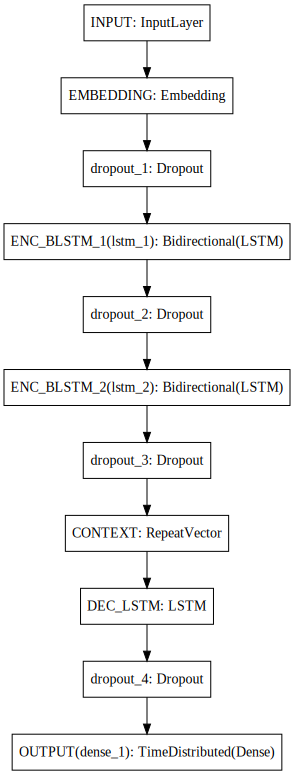

In [11]:
model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Train

In [12]:
def gen_label(s):
    """
    One-hot encoding
    """
    gen = to_categorical(s, num_classes=NUM_CLASSES)
    return gen

def data_generator_all(data, label, batch_size):
    """
    Yield batches of all data
    """
    count = 0
    while True:
        if count >= len(data): 
            count = 0
        x = np.zeros((batch_size, MAX_SENT_LEN))
        y = np.zeros((batch_size, MAX_ADJL_LEN, NUM_CLASSES))
        for i in range(batch_size):
            n = i + count
            if n > len(data)-1:
                break
            x[i, :] = data[n]
            y[i, :, :] = gen_label(label[n])
        count += batch_size
        yield (x, y)
        
def data_generator(data, label, batch_size): 
    """
    Yield batches 
    """
    index = np.arange(len(data))
    np.random.shuffle(index)    
    batches = [index[range(batch_size*i, min(len(data), batch_size*(i+1)))] for i in range(len(data)//batch_size)]
    while True:
        for i in batches:
            x, y = data[i], np.array(list(map(gen_label, label[i])))
            yield (x, y)

In [13]:
gen_train_all = data_generator(x_train_all, y_train_all, BATCH_SIZE)
gen_test = data_generator_all(x_test, y_test, BATCH_SIZE)
gen_train = data_generator(x_train, y_train, BATCH_SIZE)
gen_val = data_generator(x_val, y_val, BATCH_SIZE)

In [14]:
# Continue Trian
# filename = 'cp_logs/.hdf5'
# model.load_weights(filename)
# model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [120]:
filepath = '/Users/lizhn7/Downloads/DATA/NYT /experiment_2_3/cp_logs/weights.{epoch:03d}-{val_loss:.6f}.hdf5'
log_string = '/Users/lizhn7/Downloads/DATA/NYT /experiment_2_3/tb_logs/300-64-0.5-512-79-20-5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True)
tensorboard = TensorBoard(log_dir=log_string, 
                          histogram_freq=1, 
                          write_graph=False, 
                          write_grads=False, 
                          batch_size=BATCH_SIZE, 
                          write_images=True, 
                          embeddings_freq=1, 
                          embeddings_layer_names=None,
                          embeddings_metadata=None) 

In [121]:
history = model.fit_generator(gen_train_all, 
                              steps_per_epoch=STEPS_PER_EPOCH, 
                              epochs=NUM_EPOCHS, 
                              verbose=1,
                              callbacks=[checkpoint, tensorboard],
                              validation_data=gen_test, 
                              validation_steps=TEST_STEPS)

Epoch 1/512
20/20 [==============================] - 181s - loss: 2.5135 - acc: 0.5892 - val_loss: 1.3157 - val_acc: 0.7350
Epoch 2/512
20/20 [==============================] - 172s - loss: 1.9057 - acc: 0.6313 - val_loss: 1.1921 - val_acc: 0.7353
Epoch 3/512
20/20 [==============================] - 169s - loss: 1.8137 - acc: 0.6389 - val_loss: 1.1201 - val_acc: 0.7688
Epoch 4/512
20/20 [==============================] - 169s - loss: 1.7501 - acc: 0.6470 - val_loss: 1.0907 - val_acc: 0.7705
Epoch 5/512
20/20 [==============================] - 171s - loss: 1.7438 - acc: 0.6483 - val_loss: 1.0805 - val_acc: 0.7690
Epoch 6/512
20/20 [==============================] - 168s - loss: 1.6764 - acc: 0.6553 - val_loss: 1.0770 - val_acc: 0.7689
Epoch 7/512
20/20 [==============================] - 175s - loss: 1.6633 - acc: 0.6581 - val_loss: 1.1112 - val_acc: 0.7578
Epoch 8/512
20/20 [==============================] - 180s - loss: 1.6355 - acc: 0.6650 - val_loss: 1.0255 - val_acc: 0.7795
Epoch 9/

20/20 [==============================] - 174s - loss: 1.2892 - acc: 0.7129 - val_loss: 0.8748 - val_acc: 0.8107
Epoch 61/512
20/20 [==============================] - 174s - loss: 1.3085 - acc: 0.7131 - val_loss: 0.8782 - val_acc: 0.8118
Epoch 62/512
20/20 [==============================] - 173s - loss: 1.3250 - acc: 0.7092 - val_loss: 0.8907 - val_acc: 0.8052
Epoch 63/512
20/20 [==============================] - 172s - loss: 1.3231 - acc: 0.7066 - val_loss: 0.9089 - val_acc: 0.8016
Epoch 64/512
20/20 [==============================] - 176s - loss: 1.3311 - acc: 0.7047 - val_loss: 0.8978 - val_acc: 0.8026
Epoch 65/512
20/20 [==============================] - 173s - loss: 1.3183 - acc: 0.7099 - val_loss: 0.9394 - val_acc: 0.7929
Epoch 66/512
20/20 [==============================] - 174s - loss: 1.2988 - acc: 0.7123 - val_loss: 0.9169 - val_acc: 0.7940
Epoch 67/512
20/20 [==============================] - 174s - loss: 1.2950 - acc: 0.7109 - val_loss: 0.8687 - val_acc: 0.8060
Epoch 68/512


20/20 [==============================] - 175s - loss: 1.1185 - acc: 0.7376 - val_loss: 0.8431 - val_acc: 0.7955
Epoch 125/512
20/20 [==============================] - 173s - loss: 1.1057 - acc: 0.7389 - val_loss: 0.9011 - val_acc: 0.7830
Epoch 126/512
20/20 [==============================] - 175s - loss: 1.1287 - acc: 0.7339 - val_loss: 0.9259 - val_acc: 0.7657
Epoch 127/512
20/20 [==============================] - 174s - loss: 1.1375 - acc: 0.7314 - val_loss: 0.8681 - val_acc: 0.7885
Epoch 128/512
20/20 [==============================] - 175s - loss: 1.0907 - acc: 0.7407 - val_loss: 0.8105 - val_acc: 0.8072
Epoch 129/512
20/20 [==============================] - 174s - loss: 1.1315 - acc: 0.7305 - val_loss: 0.8642 - val_acc: 0.7853
Epoch 130/512
20/20 [==============================] - 175s - loss: 1.1350 - acc: 0.7336 - val_loss: 0.8630 - val_acc: 0.7951
Epoch 131/512
20/20 [==============================] - 175s - loss: 1.1312 - acc: 0.7329 - val_loss: 0.8560 - val_acc: 0.7877
Epoch 

20/20 [==============================] - 175s - loss: 1.0550 - acc: 0.7502 - val_loss: 0.8302 - val_acc: 0.7971
Epoch 159/512
20/20 [==============================] - 175s - loss: 1.0330 - acc: 0.7551 - val_loss: 0.7989 - val_acc: 0.8011
Epoch 160/512
20/20 [==============================] - 175s - loss: 1.0445 - acc: 0.7513 - val_loss: 0.8894 - val_acc: 0.7813
Epoch 161/512
20/20 [==============================] - 175s - loss: 1.0025 - acc: 0.7589 - val_loss: 0.8771 - val_acc: 0.7842
Epoch 162/512
20/20 [==============================] - 174s - loss: 1.0325 - acc: 0.7534 - val_loss: 0.8270 - val_acc: 0.7983
Epoch 163/512
20/20 [==============================] - 175s - loss: 1.0395 - acc: 0.7507 - val_loss: 0.9357 - val_acc: 0.7723
Epoch 164/512
20/20 [==============================] - 175s - loss: 0.9954 - acc: 0.7566 - val_loss: 0.8667 - val_acc: 0.7854
Epoch 165/512
20/20 [==============================] - 175s - loss: 1.0456 - acc: 0.7502 - val_loss: 0.8630 - val_acc: 0.7891
Epoch 

20/20 [==============================] - 176s - loss: 0.9626 - acc: 0.7642 - val_loss: 0.8812 - val_acc: 0.7844
Epoch 193/512
20/20 [==============================] - 175s - loss: 0.9643 - acc: 0.7642 - val_loss: 0.8924 - val_acc: 0.7788
Epoch 194/512
20/20 [==============================] - 176s - loss: 0.9198 - acc: 0.7751 - val_loss: 0.8750 - val_acc: 0.7850
Epoch 195/512
20/20 [==============================] - 176s - loss: 0.9764 - acc: 0.7592 - val_loss: 0.8960 - val_acc: 0.7817
Epoch 196/512
20/20 [==============================] - 176s - loss: 0.9551 - acc: 0.7654 - val_loss: 0.9097 - val_acc: 0.7807
Epoch 197/512
20/20 [==============================] - 176s - loss: 0.9341 - acc: 0.7707 - val_loss: 0.8764 - val_acc: 0.7874
Epoch 198/512
20/20 [==============================] - 176s - loss: 0.9647 - acc: 0.7620 - val_loss: 0.8619 - val_acc: 0.7900
Epoch 199/512
20/20 [==============================] - 176s - loss: 0.9668 - acc: 0.7614 - val_loss: 0.9398 - val_acc: 0.7688
Epoch 

20/20 [==============================] - 176s - loss: 0.9329 - acc: 0.7696 - val_loss: 0.9532 - val_acc: 0.7659
Epoch 227/512
20/20 [==============================] - 176s - loss: 0.9277 - acc: 0.7685 - val_loss: 0.9938 - val_acc: 0.7570
Epoch 228/512
20/20 [==============================] - 176s - loss: 0.8999 - acc: 0.7764 - val_loss: 0.9892 - val_acc: 0.7563
Epoch 229/512
20/20 [==============================] - 177s - loss: 0.9349 - acc: 0.7653 - val_loss: 0.9051 - val_acc: 0.7797
Epoch 230/512
20/20 [==============================] - 176s - loss: 0.9110 - acc: 0.7728 - val_loss: 0.9743 - val_acc: 0.7632
Epoch 231/512
20/20 [==============================] - 176s - loss: 0.9368 - acc: 0.7668 - val_loss: 0.9335 - val_acc: 0.7709
Epoch 232/512
20/20 [==============================] - 176s - loss: 0.9323 - acc: 0.7659 - val_loss: 0.9894 - val_acc: 0.7618
Epoch 233/512
20/20 [==============================] - 181s - loss: 0.9304 - acc: 0.7669 - val_loss: 0.9348 - val_acc: 0.7672
Epoch 

20/20 [==============================] - 185s - loss: 0.8294 - acc: 0.7848 - val_loss: 0.9851 - val_acc: 0.7591
Epoch 261/512
20/20 [==============================] - 186s - loss: 0.8962 - acc: 0.7732 - val_loss: 0.9779 - val_acc: 0.7614
Epoch 262/512
20/20 [==============================] - 186s - loss: 0.8524 - acc: 0.7852 - val_loss: 0.9966 - val_acc: 0.7577
Epoch 263/512
20/20 [==============================] - 185s - loss: 0.8579 - acc: 0.7818 - val_loss: 0.9569 - val_acc: 0.7662
Epoch 264/512
20/20 [==============================] - 186s - loss: 0.8541 - acc: 0.7811 - val_loss: 0.9595 - val_acc: 0.7675
Epoch 265/512
20/20 [==============================] - 187s - loss: 0.8714 - acc: 0.7803 - val_loss: 0.9769 - val_acc: 0.7655
Epoch 266/512
20/20 [==============================] - 186s - loss: 0.8907 - acc: 0.7774 - val_loss: 0.9333 - val_acc: 0.7703
Epoch 267/512
20/20 [==============================] - 186s - loss: 0.8834 - acc: 0.7766 - val_loss: 1.0205 - val_acc: 0.7525
Epoch 

20/20 [==============================] - 186s - loss: 0.8590 - acc: 0.7821 - val_loss: 1.0174 - val_acc: 0.7627
Epoch 295/512
20/20 [==============================] - 187s - loss: 0.8467 - acc: 0.7836 - val_loss: 0.9651 - val_acc: 0.7697
Epoch 296/512
20/20 [==============================] - 187s - loss: 0.8185 - acc: 0.7889 - val_loss: 1.0089 - val_acc: 0.7675
Epoch 297/512
20/20 [==============================] - 187s - loss: 0.8816 - acc: 0.7748 - val_loss: 1.0415 - val_acc: 0.7548
Epoch 298/512
20/20 [==============================] - 187s - loss: 0.9018 - acc: 0.7720 - val_loss: 1.0253 - val_acc: 0.7541
Epoch 299/512
20/20 [==============================] - 185s - loss: 0.8370 - acc: 0.7859 - val_loss: 0.9520 - val_acc: 0.7751
Epoch 300/512
20/20 [==============================] - 188s - loss: 0.8409 - acc: 0.7841 - val_loss: 1.0414 - val_acc: 0.7590
Epoch 301/512
10/20 [==============>...............] - ETA: 85s - loss: 0.8600 - acc: 0.7809

KeyboardInterrupt: 

# Evaluate

In [122]:
filename = '/Users/lizhn7/Downloads/DATA/NYT /experiment_2_3/cp_logs/weights.095-0.797459.hdf5'
model.load_weights(filename)

In [123]:
result = np.argmax(model.predict(x_test, batch_size=BATCH_SIZE, verbose=1), -1)

395/395 [==============================] - 18s    


In [124]:
adjlResult = [' '.join([index2token.get(i, str(i)) for i in sent if i != 0]) for sent in result]
actResult = [' '.join([index2token.get(i, str(i)) for i in sent if i != 0]) for sent in y_test]
for i in range(395):
    print('Predict: \t%s' % adjlResult[i])
    print('Ground Truth: \t%s' % actResult[i])
    print('---')

Predict: 	8 POI 11 RE contains EOP
Ground Truth: 	9 POI 10 RE country EOP
---
Predict: 	2 POI POI RE contains EOP
Ground Truth: 	16 POI 14 RE country EOP
---
Predict: 	8 POI POI RE contains EOP RE
Ground Truth: 	11 12 POI 13 RE nationality EOP
---
Predict: 	12 POI POI RE RE EOP
Ground Truth: 	14 POI 9 10 11 12 RE contains EOP
---
Predict: 	12 POI POI 11 RE contains EOP
Ground Truth: 	12 13 POI 15 16 RE place_lived EOP
---
Predict: 	8 POI 7 RE contains EOP
Ground Truth: 	10 POI 9 RE contains EOP
---
Predict: 	1 2 POI POI RE RE EOP EOP
Ground Truth: 	8 9 POI 1 2 3 RE founders EOP
---
Predict: 	13 POI POI RE contains EOP
Ground Truth: 	20 POI 16 RE country EOP
---
Predict: 	12 POI POI RE contains EOP
Ground Truth: 	19 POI 13 RE country POI 13 RE country EOP 19 POI 13 RE country POI 13 RE country EOP
---
Predict: 	2 POI POI RE contains EOP
Ground Truth: 	17 POI 6 RE contains EOP
---
Predict: 	17 POI POI POI RE RE RE EOP
Ground Truth: 	26 27 POI 29 30 RE company EOP
---
Predict: 	10 POI POI

In [15]:
filename = '/Users/lizhn7/Downloads/DATA/nyt/experiment_2_3/cp_logs/weights.332-0.758637.hdf5'
model.load_weights(filename)

In [16]:
result = np.argmax(model.predict(x_test, batch_size=BATCH_SIZE, verbose=1), -1)

395/395 [==============================] - 25s    


In [17]:
adjlResult = [' '.join([index2token.get(i, str(i)) for i in sent if i != 0]) for sent in result]
actResult = [' '.join([index2token.get(i, str(i)) for i in sent if i != 0]) for sent in y_test]
for i in range(395):
    print('Predict: \t%s' % adjlResult[i])
    print('Ground Truth: \t%s' % actResult[i])
    print('---')

Predict: 	10 POI 9 RE contains EOP
Ground Truth: 	9 POI 10 RE country EOP
---
Predict: 	16 POI 19 RE RE contains EOP
Ground Truth: 	16 POI 14 RE country EOP
---
Predict: 	9 POI 9 RE contains POI 9 RE contains POI 9 RE contains POI 9 RE contains POI POI RE contains POI POI contains POI POI
Ground Truth: 	11 12 POI 13 RE nationality EOP
---
Predict: 	14 POI 13 RE contains EOP
Ground Truth: 	14 POI 9 10 11 12 RE contains EOP
---
Predict: 	15 15 POI 15 15 RE company EOP
Ground Truth: 	12 13 POI 15 16 RE place_lived EOP
---
Predict: 	10 POI 9 RE contains EOP
Ground Truth: 	10 POI 9 RE contains EOP
---
Predict: 	1 2 POI POI 9 9 RE company EOP EOP 9 POI POI 2 2 RE RE founders EOP
Ground Truth: 	8 9 POI 1 2 3 RE founders EOP
---
Predict: 	18 POI 17 RE contains EOP EOP
Ground Truth: 	20 POI 16 RE country EOP
---
Predict: 	13 POI 30 RE contains POI RE contains EOP
Ground Truth: 	19 POI 13 RE country POI 13 RE country EOP 19 POI 13 RE country POI 13 RE country EOP
---
Predict: 	6 POI 16 RE countr

In [18]:
result = np.argmax(model.predict(x_val[:395], batch_size=BATCH_SIZE, verbose=1), -1)

395/395 [==============================] - 25s    


In [19]:
adjlResult = [' '.join([index2token.get(i, str(i)) for i in sent if i != 0]) for sent in result]
actResult = [' '.join([index2token.get(i, str(i)) for i in sent if i != 0]) for sent in y_val[:395]]
for i in range(395):
    print('Predict: \t%s' % adjlResult[i])
    print('Ground Truth: \t%s' % actResult[i])
    print('---')

Predict: 	1 POI 35 RE administrative_divisions POI 36 RE administrative_divisions POI 35 RE contains EOP 33 POI 1 RE country EOP
Ground Truth: 	1 POI 33 RE administrative_divisions POI 33 RE contains POI 33 RE capital EOP 33 POI 1 RE country EOP
---
Predict: 	7 POI 14 RE administrative_divisions POI 15 RE contains POI 15 RE contains EOP 14 POI 8 RE country EOP
Ground Truth: 	9 POI 15 RE capital POI 15 RE administrative_divisions POI 15 RE contains EOP 15 POI 9 RE country EOP
---
Predict: 	22 23 POI 26 26 RE contains EOP
Ground Truth: 	23 24 POI 29 30 RE contains EOP
---
Predict: 	5 POI POI RE RE EOP EOP
Ground Truth: 	18 POI 17 RE contains EOP
---
Predict: 	9 9 POI 9 9 RE contains EOP
Ground Truth: 	8 9 POI 11 12 RE administrative_divisions POI 11 12 RE contains EOP 11 12 POI 8 9 RE country EOP
---
Predict: 	23 25 POI POI 21 RE RE place_lived EOP
Ground Truth: 	22 23 24 POI 6 7 RE contains EOP 66 67 POI 22 23 24 RE place_of_birth POI 22 23 24 RE place_lived EOP 70 71 POI 22
---
Predict

---
Predict: 	28 30 POI POI RE RE company EOP POI POI POI POI RE EOP EOP
Ground Truth: 	11 POI 11 12 RE contains EOP
---
Predict: 	5 POI 5 RE contains EOP
Ground Truth: 	5 POI 4 RE contains EOP
---
Predict: 	31 31 POI 31 RE place_lived EOP
Ground Truth: 	32 33 POI 30 RE place_lived POI 30 RE place_of_birth POI 30 RE place_of_death EOP
---
Predict: 	16 POI 16 RE contains POI 17 RE contains EOP
Ground Truth: 	29 30 POI 16 RE nationality EOP
---
Predict: 	2 POI 28 RE capital POI 28 RE contains EOP
Ground Truth: 	2 POI 27 RE capital POI 27 RE contains EOP
---
Predict: 	7 POI 36 RE capital POI 36 RE contains EOP
Ground Truth: 	6 POI 37 RE contains POI 37 RE capital EOP
---
Predict: 	30 31 POI 30 RE RE EOP EOP POI RE RE
Ground Truth: 	35 36 POI 29 30 RE place_lived EOP
---
Predict: 	20 POI 19 RE contains EOP
Ground Truth: 	20 POI 19 RE contains EOP
---
Predict: 	5 POI 5 5 RE contains EOP
Ground Truth: 	7 POI 4 5 RE contains EOP
---
Predict: 	13 POI POI 11 RE contains EOP
Ground Truth: 	14 PO

In [125]:
a = [[index2token.get(i, str(i)) for i in sent if i != 0] for sent in y_test]

In [127]:
np.max([len(i) for i in a])

28